# BITCOIN

Bitcoin, is a digital currency which was created as a way to send money over the internet relying on peer-to-peer software and cryptography. It is intended to be used just like any other tradional currencies in monetary transactions but without being governed by banks or the government. That is why Bitcoin is also known as a decentralised digital currency.

Here we will be exploring the relationship between bitcoin and social media to see if there are any correlation for Bitcoins fluctuation caused by social media

## Importing relevant packages


In [162]:
import pandas as pd #for data analysis
import numpy as np #
import requests #
import matplotlib.pyplot as plt #for plotting charts
import seaborn as sns #for visualization
import math

#### The URL is the address which leads us to the API endpoint we have specified.

In [4]:
url = 'https://api.lunarcrush.com/v2?data=assets&key=jayc5cycaocsshcrhkhmt&symbol=BTC&data_points=720&interval=day&change=1d,2y'

- A V2 API key is generated for authenticating the requests associated with the project for usage and billing purposes.
- Here we are requesting data on assets for details, overall metrics, and time series metrics for one or multiple assets. We refer to all supported cryptocurrencies as assets.
- We have specified a associated symbol to the asset, in this case BTC is the symbol for BITCOIN
- We have specified 720 of time series data points, the maximum.
- The change intervals metric we are looking at is daily over 2 years.

## Loading the data

In [5]:
r = requests.get(url) # Loading the data from API by making a GET request from an API endpoint, LunarCrush.


In [6]:
r # ensuring the response code indicates a successful request

<Response [200]>

## Extracting the data


In [7]:
json = r.json() #Extracting data from the request using Json() method

In [8]:
json

{'config': {'change': '1d,2y',
  'data': 'assets',
  'data_points': 720,
  'interval': 'day',
  'symbol': "'BTC'"},
 'usage': {'day': 2, 'month': 24},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'price': 47035.46108317,
   'price_btc': 1,
   'market_cap': 883876838462,
   'percent_change_24h': 6.11,
   'percent_change_7d': -1.61,
   'percent_change_30d': 46.16,
   'volume_24h': 46331633479.81,
   'max_supply': '21000000',
   'timeSeries': [{'asset_id': 1,
     'time': 1567296000,
     'open': 9593.835884,
     'close': 9760.177254,
     'high': 9760.177254,
     'low': 9593.835884,
     'volume': 8184970504,
     'market_cap': None,
     'url_shares': 87,
     'unique_url_shares': 87,
     'reddit_posts': 170,
     'reddit_posts_score': 4920,
     'reddit_comments': 791,
     'reddit_comments_score': 3551,
     'tweets': 37310,
     'tweet_spam': 4161,
     'tweet_followers': None,
     'tweet_quotes': None,
     'tweet_retweets': None,
     'tweet_replies': None,


In [9]:
json.keys()
#translating JSON structured data into a dataframe.
#returns the keys of the dictionary as a list.
#which can be used to explore the JSON, like selecting a column in a Pandas Dataframe.

dict_keys(['config', 'usage', 'data'])

#### Checking to see which is the best key to transform into a DataFrame

In [10]:
config = json['config'] #not enough data to later perform the analysis we intended for our project.
config

{'change': '1d,2y',
 'data': 'assets',
 'data_points': 720,
 'interval': 'day',
 'symbol': "'BTC'"}

In [11]:
usage = json['usage'] #not enough data to performa the analysis we intended for our project.
usage

{'day': 2, 'month': 24}

In [12]:
data = json['data'] #this is perfect to transform into a DataFrame for our project because there is a lot of relevant data we can extract
data

[{'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'price': 47035.46108317,
  'price_btc': 1,
  'market_cap': 883876838462,
  'percent_change_24h': 6.11,
  'percent_change_7d': -1.61,
  'percent_change_30d': 46.16,
  'volume_24h': 46331633479.81,
  'max_supply': '21000000',
  'timeSeries': [{'asset_id': 1,
    'time': 1567296000,
    'open': 9593.835884,
    'close': 9760.177254,
    'high': 9760.177254,
    'low': 9593.835884,
    'volume': 8184970504,
    'market_cap': None,
    'url_shares': 87,
    'unique_url_shares': 87,
    'reddit_posts': 170,
    'reddit_posts_score': 4920,
    'reddit_comments': 791,
    'reddit_comments_score': 3551,
    'tweets': 37310,
    'tweet_spam': 4161,
    'tweet_followers': None,
    'tweet_quotes': None,
    'tweet_retweets': None,
    'tweet_replies': None,
    'tweet_favorites': None,
    'tweet_sentiment1': 1742,
    'tweet_sentiment2': 3207,
    'tweet_sentiment3': 6477,
    'tweet_sentiment4': 19967,
    'tweet_sentiment5': 1756,
    'tweet

#### Checking the class type of each key

In [13]:
print(type(json['config'])) #nested dictionaries

<class 'dict'>


In [14]:
print(type(json['usage'])) #nested dictionaries

<class 'dict'>


In [15]:
print(type(json['data'])) #a list

<class 'list'>


#### Applying index to test what 'data' it is a list of

In [16]:
print(type(json['data'][0])) # a list of dictionaries

<class 'dict'>


## Transforming data into a Pandas DataFrame

In [17]:
df = pd.DataFrame(json['data'])

In [18]:
df # This unexpectedly returned only one row of data, which we need to normalize in order to retrieve the rest of the data.

id     name symbol         price  price_btc    market_cap  \
0   1  Bitcoin    BTC  47035.461083          1  883876838462   

   percent_change_24h  percent_change_7d  percent_change_30d    volume_24h  \
0                6.11              -1.61               46.16  4.633163e+10   

   ... market_dominance_1d market_dominance_1d_previous  \
0  ...           40.272917                    40.024516   

   market_dominance_1d_percent_change      close_2y  close_2y_percent_change  \
0                           -4.432441  47035.461083               365.041693   

   social_volume_global_2y  social_volume_global_2y_previous  \
0                363036714                            330447   

   market_dominance_2y  market_dominance_2y_previous  \
0            40.285265                          None   

   market_dominance_2y_percent_change  
0                                None  

[1 rows x 230 columns]

## Normalizing the data

In [19]:
df = pd.json_normalize(data, record_path='timeSeries') #converting each data in the list into a row of tabular form.

In [20]:
df

asset_id        time          open         close          high  \
0           1  1567296000   9593.835884   9760.177254   9760.177254   
1           1  1567382400   9862.492351  10374.426465  10380.344756   
2           1  1567468800  10366.178781  10602.404439  10672.611272   
3           1  1567555200  10558.217239  10567.312687  10707.844819   
4           1  1567641600  10548.763294  10593.704916  10593.930427   
..        ...         ...           ...           ...           ...   
715         1  1629072000  47020.298321  45984.498435  47860.973844   
716         1  1629158400  45981.817616  44799.750574  46978.212449   
717         1  1629244800  44748.922728  44776.765550  45944.593608   
718         1  1629331200  44762.551260  46810.141864  47068.786788   
719         1  1629417600  46754.178327  47046.660667  47345.801053   

              low        volume    market_cap  url_shares  unique_url_shares  \
0     9593.835884  8.184971e+09           NaN          87                 87   
1     9862.492351  1.255304e+10           NaN          74                 74   
2    10352.231916  1.337401e+10           NaN          65                 65   
3    10178.037594  1.147405e+10           NaN          59                 59   
4    10548.763294  9.848187e+09           NaN          67                 67   
..            ...           ...           ...         ...                ...   
715  45791.673107  4.417959e+10  8.951551e+11       40654              21931   
716  44578.034966  4.848928e+10  8.616449e+11       43915              21706   
717  44479.884501  4.432604e+10  8.439472e+11       49048              21879   
718  44266.003231  5.043782e+10  8.470319e+11       50294              23036   
719  46704.284403  2.245754e+10  8.392321e+11       49933              23463   

     ...  medium  youtube  social_contributors  social_volume  price_btc  \
0    ...     NaN      NaN               9597.0          38628          1   
1    ...     NaN      NaN              11568.0          43166          1   
2    ...     NaN      NaN              13785.0          38263          1   
3    ...     NaN      NaN              14916.0          38027          1   
4    ...     NaN      NaN              12382.0          41008          1   
..   ...     ...      ...                  ...            ...        ...   
715  ...    15.0      8.0             155377.0         292122          1   
716  ...    12.0      6.0             156489.0         289323          1   
717  ...     3.0      2.0             145892.0         320363          1   
718  ...     3.0      3.0                  NaN         293967          1   
719  ...     5.0      3.0                  NaN         301715          1   

     social_volume_global  social_dominance  percent_change_24h  \
0                107761.0         35.845993            1.538392   
1                120150.0         35.926758            6.293423   
2                120085.0         31.863264            2.197500   
3                113061.0         33.634056           -0.330979   
4                117822.0         34.805045            0.249753   
..                    ...               ...                 ...   
715             1535031.0         19.030365           -2.199973   
716             1540749.0         18.778075           -2.576407   
717             1398855.0         22.901802           -0.051306   
718             1262615.0         23.282394            4.541142   
719             1283848.0         23.500835            6.110000   

     market_cap_global  market_dominance  
0                  NaN               NaN  
1                  NaN               NaN  
2                  NaN               NaN  
3                  NaN               NaN  
4                  NaN               NaN  
..                 ...               ...  
715       2.121663e+12         42.191198  
716       2.061653e+12         41.793897  
717       2.084001e+12         40.496483  
718       2.182436e+12         38.811303  


## Exporting to CSV

In [21]:
df.to_csv('/Users/mhaikunchorn/Desktop/Data_Pathway/BTC_GP_FINAL.csv')

## Reading a CSV

In [22]:
df = pd.read_csv('/Users/mhaikunchorn/Desktop/Data_Pathway/BTC_DF.csv')

In [23]:
df

Unnamed: 0  asset_id        time          open         close  \
0             0         1  1567123200   9495.399060   9592.385842   
1             1         1  1567209600   9667.671418   9612.302402   
2             2         1  1567296000   9593.835884   9760.177254   
3             3         1  1567382400   9862.492351  10374.426465   
4             4         1  1567468800  10366.178781  10602.404439   
..          ...       ...         ...           ...           ...   
715         715         1  1628899200  47803.914436  47104.804361   
716         716         1  1628985600  47106.487606  47018.900042   
717         717         1  1629072000  47020.294197  45984.496357   
718         718         1  1629158400  45980.403210  44799.054041   
719         719         1  1629244800  44765.604024  45394.730992   

             high           low        volume    market_cap  url_shares  ...  \
0     9636.970473   9435.401440  1.039902e+10           NaN          56  ...   
1     9667.671418   9612.302402  8.266929e+09           NaN          56  ...   
2     9760.177254   9593.835884  8.184971e+09           NaN          87  ...   
3    10380.344756   9862.492351  1.255304e+10           NaN          74  ...   
4    10672.611272  10352.231916  1.337401e+10           NaN          65  ...   
..            ...           ...           ...           ...         ...  ...   
715  48087.820230  46147.528118  4.136824e+10  8.955971e+11       42108  ...   
716  47371.004885  45769.721590  4.039261e+10  8.865996e+11       39917  ...   
717  47861.018974  45791.666944  4.407624e+10  8.951551e+11       40654  ...   
718  46992.328751  44525.655237  4.821344e+10  8.616449e+11       43915  ...   
719  45590.269049  44422.455194  2.897791e+10  8.649534e+11       50204  ...   

     medium  youtube  social_contributors  social_volume  price_btc  \
0       NaN      NaN                12955          30007          1   
1       NaN      NaN                11277          32715          1   
2       NaN      NaN                 9597          38628          1   
3       NaN      NaN                11568          43166          1   
4       NaN      NaN                13785          38263          1   
..      ...      ...                  ...            ...        ...   
715    14.0      5.0               161253         281972          1   
716     8.0      6.0               158628         259767          1   
717    15.0      8.0               155371         292122          1   
718    12.0      6.0               156476         289323          1   
719     2.0      3.0               102876         319493          1   

     social_volume_global  social_dominance  percent_change_24h  \
0                 90535.0         33.144088            0.893360   
1                 94031.0         34.791718            0.207629   
2                107761.0         35.845993            1.538392   
3                120150.0         35.926758            6.293423   
4                120085.0         31.863264            2.197500   
..                    ...               ...                 ...   
715             1250018.0         22.557435           -1.365705   
716             1118434.0         23.225957           -0.182368   
717             1535031.0         19.030365           -2.199974   
718             1540749.0         18.778075           -2.577917   
719             1464603.0         21.814307           -2.490000   

     market_cap_global  market_dominance  
0                  NaN               NaN  
1                  NaN               NaN  
2                  NaN               NaN  
3                  NaN               NaN  
4                  NaN               NaN  
..                 ...               ...  
715       2.146890e+12         41.716031  
716       2.406377e+12         36.843758  
717       2.121517e+12         42.194103  
718       2.061479e+12         41.797409  
719       2.093390e+12         41.318313  

[720 rows x 61 columns]

## Exploratory Data Analysis

#### Checking the dimension of the DataFrame
This data set has 720 records and 61 features

In [24]:
df.shape

(720, 61)

#### Checking the data types
* We can see here how many of each data type this DataFrame contains, 39 floating point numbers and 22 integers indicates our datatype are all numeric.

* Cannot directly put this pandas data into an array object. This is because the n-dimensional array object within the NumPy library requires all the values to have the same Data type. In this case, we would need to convert all the integers into floats. Arrays do not generally have column headings whereas a DataFrame does

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               720 non-null    int64  
 1   asset_id                 720 non-null    int64  
 2   time                     720 non-null    int64  
 3   open                     720 non-null    float64
 4   close                    720 non-null    float64
 5   high                     720 non-null    float64
 6   low                      720 non-null    float64
 7   volume                   720 non-null    float64
 8   market_cap               708 non-null    float64
 9   url_shares               720 non-null    int64  
 10  unique_url_shares        720 non-null    int64  
 11  reddit_posts             709 non-null    float64
 12  reddit_posts_score       709 non-null    float64
 13  reddit_comments          709 non-null    float64
 14  reddit_comments_score    7

#### Reviewing rows
To understand column names and the type of values within each columns. Such as Volume holding data to the exponent of up to 10 and there are NaN values in various columns which we will later deal with.

In [26]:
df.head(10) # Sampling the first 10 rows of the DataFrame

Unnamed: 0  asset_id        time          open         close          high  \
0           0         1  1567123200   9495.399060   9592.385842   9636.970473   
1           1         1  1567209600   9667.671418   9612.302402   9667.671418   
2           2         1  1567296000   9593.835884   9760.177254   9760.177254   
3           3         1  1567382400   9862.492351  10374.426465  10380.344756   
4           4         1  1567468800  10366.178781  10602.404439  10672.611272   
5           5         1  1567555200  10558.217239  10567.312687  10707.844819   
6           6         1  1567641600  10548.763294  10593.704916  10593.930427   
7           7         1  1567728000  10502.938716  10312.026406  10754.598586   
8           8         1  1567814400  10598.249275  10495.861838  10598.249275   
9           9         1  1567900800  10576.878344  10416.095562  10576.878344   

            low        volume  market_cap  url_shares  ...  medium  youtube  \
0   9435.401440  1.039902e+10         NaN          56  ...     NaN      NaN   
1   9612.302402  8.266929e+09         NaN          56  ...     NaN      NaN   
2   9593.835884  8.184971e+09         NaN          87  ...     NaN      NaN   
3   9862.492351  1.255304e+10         NaN          74  ...     NaN      NaN   
4  10352.231916  1.337401e+10         NaN          65  ...     NaN      NaN   
5  10178.037594  1.147405e+10         NaN          59  ...     NaN      NaN   
6  10548.763294  9.848187e+09         NaN          67  ...     NaN      NaN   
7  10260.870805  1.391248e+10         NaN          44  ...     NaN      NaN   
8  10495.861838  1.106792e+10         NaN          40  ...     NaN      NaN   
9  10416.095562  9.425138e+09         NaN          67  ...     NaN      NaN   

   social_contributors  social_volume  price_btc  social_volume_global  \
0                12955          30007          1               90535.0   
1                11277          32715          1               94031.0   
2                 9597          38628          1              107761.0   
3                11568          43166          1              120150.0   
4                13785          38263          1              120085.0   
5                14916          38027          1              113061.0   
6                12382          41008          1              117822.0   
7                15722          31520          1               97221.0   
8                38797          32842          1               92630.0   
9                13540          38937          1              111045.0   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0         33.144088            0.893360                NaN               NaN  
1         34.791718            0.207629                NaN               NaN  
2         35.845993            1.538392                NaN               NaN  
3         35.926758            6.293423                NaN               NaN  
4         31.863264            2.197500                NaN               NaN  
5         33.634056           -0.330979                NaN               NaN  
6         34.805045            0.249753                NaN               NaN  
7         32.420979           -2.658924                NaN               NaN  
8         35.455036            1.782728                NaN               NaN  
9         35.064163           -0.759978                NaN               NaN  

[10 rows x 61 columns]

In [27]:
df.tail(10) # Sampling last 10 rows of the DataFrame

Unnamed: 0  asset_id        time          open         close  \
710         710         1  1628467200  43810.948868  46274.223807   
711         711         1  1628553600  46261.548187  45599.514628   
712         712         1  1628640000  45624.436964  45600.720742   
713         713         1  1628726400  45593.382737  44459.569287   
714         714         1  1628812800  44455.497240  47757.024200   
715         715         1  1628899200  47803.914436  47104.804361   
716         716         1  1628985600  47106.487606  47018.900042   
717         717         1  1629072000  47020.294197  45984.496357   
718         718         1  1629158400  45980.403210  44799.054041   
719         719         1  1629244800  44765.604024  45394.730992   

             high           low        volume    market_cap  url_shares  ...  \
710  46430.451937  43038.618433  6.102358e+10  8.122620e+11       42493  ...   
711  46611.052463  44804.754201  4.754943e+10  8.632995e+11       50803  ...   
712  46669.396336  45593.084496  4.567896e+10  8.589353e+11       60714  ...   
713  46061.354452  43916.468592  4.781821e+10  8.602899e+11       52996  ...   
714  47805.490109  44455.497240  4.517568e+10  8.368134e+11       47308  ...   
715  48087.820230  46147.528118  4.136824e+10  8.955971e+11       42108  ...   
716  47371.004885  45769.721590  4.039261e+10  8.865996e+11       39917  ...   
717  47861.018974  45791.666944  4.407624e+10  8.951551e+11       40654  ...   
718  46992.328751  44525.655237  4.821344e+10  8.616449e+11       43915  ...   
719  45590.269049  44422.455194  2.897791e+10  8.649534e+11       50204  ...   

     medium  youtube  social_contributors  social_volume  price_btc  \
710     9.0     12.0               192759         337731          1   
711    11.0     14.0               199577         341264          1   
712     9.0     14.0               187677         348574          1   
713    12.0      3.0               161179         306389          1   
714    11.0      3.0               168122         314522          1   
715    14.0      5.0               161253         281972          1   
716     8.0      6.0               158628         259767          1   
717    15.0      8.0               155371         292122          1   
718    12.0      6.0               156476         289323          1   
719     2.0      3.0               102876         319493          1   

     social_volume_global  social_dominance  percent_change_24h  \
710             1226395.0         27.538517            5.607439   
711             1139561.0         29.946971           -1.458067   
712             1272537.0         27.392052            0.002645   
713             1191481.0         25.714972           -2.502486   
714             1159169.0         27.133403            7.416750   
715             1250018.0         22.557435           -1.365705   
716             1118434.0         23.225957           -0.182368   
717             1535031.0         19.030365           -2.199974   
718             1540749.0         18.778075           -2.577917   
719             1464603.0         21.814307           -2.490000   

     market_cap_global  market_dominance  
710       1.995020e+12         40.714476  
711       1.997057e+12         43.228592  
712       2.036250e+12         42.182223  
713       1.995297e+12         43.115872  
714       2.147366e+12         38.969299  
715       2.146890e+12         41.716031  
716       2.406377e+12         36.843758  
717       2.121517e+12         42.194103  
718       2.061479e+12         41.797409  
719       2.093390e+12         41.318313  

[10 rows x 61 columns]

In [28]:
df.sample(10) #Sampling random 10 rows of the DataFrame

Unnamed: 0  asset_id        time          open         close  \
478         478         1  1608422400  23750.731328  23531.496721   
34           34         1  1570060800   8313.101486   8235.246580   
6             6         1  1567641600  10548.763294  10593.704916   
45           45         1  1571011200   8365.919122   8349.142715   
483         483         1  1608854400  23704.257092  24638.698904   
178         178         1  1582502400   9740.666337   9673.326198   
378         378         1  1599782400  10484.156768  10396.120599   
441         441         1  1605225600  16544.819664  16330.095809   
281         281         1  1591401600   9705.000527   9697.686445   
537         537         1  1613520000  49428.085406  52029.909445   

             high           low        volume    market_cap  url_shares  ...  \
478  24188.395429  23035.686623  3.807070e+10  4.371371e+11       34154  ...   
34    8333.555602   8235.246580  9.682412e+09  1.481335e+11       21086  ...   
6    10593.930427  10548.763294  9.848187e+09           NaN          67  ...   
45    8393.444928   8314.986797  1.004767e+10  1.488165e+11       21408  ...   
483  24760.710609  23466.751058  4.109418e+10  4.578140e+11       28195  ...   
178   9740.666337   9673.326198  3.424814e+10  1.789828e+11       21323  ...   
378  10484.156768  10396.120599  2.107813e+10  1.915229e+11       31224  ...   
441  16544.819664  16330.095809  2.676602e+10  3.014050e+11       25560  ...   
281   9705.000527   9689.932061  2.220834e+10  1.766504e+11       30234  ...   
537  52385.975856  49294.646493  7.448029e+10  9.196486e+11       60097  ...   

     medium  youtube  social_contributors  social_volume  price_btc  \
478     8.0     62.0                55034         212347          1   
34      NaN      NaN                12675          50557          1   
6       NaN      NaN                12382          41008          1   
45      NaN      NaN                12729          52029          1   
483     6.0     38.0                34169         138104          1   
178    11.0      9.0                30542         102361          1   
378    10.0     89.0                28375         108599          1   
441    14.0     54.0                38839         119238          1   
281    19.0     67.0                25928         113125          1   
537    44.0     12.0                93394         409158          1   

     social_volume_global  social_dominance  percent_change_24h  \
478              367601.0         57.765621           -1.150221   
34               142128.0         35.571457           -1.765160   
6                117822.0         34.805045            0.249753   
45               137687.0         37.787881            0.658030   
483              322634.0         42.805160            4.143425   
178              276682.0         36.995901           -3.292332   
378              257046.0         42.248858            0.390470   
441              284107.0         41.969399            0.275792   
281              216746.0         52.192428            0.453503   
537              918280.0         44.556998            5.418375   

     market_cap_global  market_dominance  
478       6.718339e+11         65.066250  
34        2.174522e+11         68.122338  
6                  NaN               NaN  
45        2.258522e+11         65.891098  
483       6.791956e+11         67.405315  
178       2.800122e+11         63.919653  
378       3.437840e+11         55.710245  
441       4.763848e+11         63.269215  
281       2.772795e+11         63.708402  
537       1.597797e+12         57.557278  

[10 rows x 61 columns]

## Extracting Relevant Data

In [29]:
df.columns.values #This attribute returns an array of column names so we can see which one we'd like to select

array(['Unnamed: 0', 'asset_id', 'time', 'open', 'close', 'high', 'low',
       'volume', 'market_cap', 'url_shares', 'unique_url_shares',
       'reddit_posts', 'reddit_posts_score', 'reddit_comments',
       'reddit_comments_score', 'tweets', 'tweet_spam', 'tweet_followers',
       'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment',
       'sentiment_absolute', 'sentiment_relative', 'search_average',
       'news', 'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'alt_rank', 'alt_rank_30d',
       'alt_rank_hour_average', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank',
       'social_volume_24h_r

#### Creating a new DataFrame with selected columns

In [30]:
df = df[['time', 'open', 'close','high', 'low', 'volume','social_score', 'correlation_rank', 'volatility','percent_change_24h','social_volume']].copy()
df

time          open         close          high           low  \
0    1567123200   9495.399060   9592.385842   9636.970473   9435.401440   
1    1567209600   9667.671418   9612.302402   9667.671418   9612.302402   
2    1567296000   9593.835884   9760.177254   9760.177254   9593.835884   
3    1567382400   9862.492351  10374.426465  10380.344756   9862.492351   
4    1567468800  10366.178781  10602.404439  10672.611272  10352.231916   
..          ...           ...           ...           ...           ...   
715  1628899200  47803.914436  47104.804361  48087.820230  46147.528118   
716  1628985600  47106.487606  47018.900042  47371.004885  45769.721590   
717  1629072000  47020.294197  45984.496357  47861.018974  45791.666944   
718  1629158400  45980.403210  44799.054041  46992.328751  44525.655237   
719  1629244800  44765.604024  45394.730992  45590.269049  44422.455194   

           volume  social_score  correlation_rank  volatility  \
0    1.039902e+10     210852936               NaN    0.151796   
1    8.266929e+09     198138317               NaN    0.090203   
2    8.184971e+09     259500833               NaN    0.257690   
3    1.255304e+10     321030863               NaN    0.740612   
4    1.337401e+10     264399710               NaN    0.528566   
..            ...           ...               ...         ...   
715  4.136824e+10     995108664               4.0    0.021280   
716  4.039261e+10     899833321               2.5    0.010992   
717  4.407624e+10    1205480122               3.4    0.012564   
718  4.821344e+10    1164213025               2.5    0.012999   
719  2.897791e+10    1222601993               3.5    0.013381   

     percent_change_24h  social_volume  
0              0.893360          30007  
1              0.207629          32715  
2              1.538392          38628  
3              6.293423          43166  
4              2.197500          38263  
..                  ...            ...  
715           -1.365705         281972  
716           -0.182368         259767  
717           -2.199974         292122  
718           -2.577917         289323  
719           -2.490000         319493  

[720 rows x 11 columns]

## Dealing with NULL values

Options to drop or replace with a 0 value. For our project the analysis we're doing does require the NULL values to be replaced with 0 rather than to drop them for further analysis.


In [31]:
df.isnull().tail(10)

#shows 'False' if something is NOT missing and 'True' if it IS missing.
#Pandas detects NaN and converts them into True and False.
#This means that the sample of the last 10 rows have no missing values

time   open  close   high    low  volume  social_score  \
710  False  False  False  False  False   False         False   
711  False  False  False  False  False   False         False   
712  False  False  False  False  False   False         False   
713  False  False  False  False  False   False         False   
714  False  False  False  False  False   False         False   
715  False  False  False  False  False   False         False   
716  False  False  False  False  False   False         False   
717  False  False  False  False  False   False         False   
718  False  False  False  False  False   False         False   
719  False  False  False  False  False   False         False   

     correlation_rank  volatility  percent_change_24h  social_volume  
710             False       False               False          False  
711             False       False               False          False  
712             False       False               False          False  
713             False       False               False          False  
714             False       False               False          False  
715             False       False               False          False  
716             False       False               False          False  
717             False       False               False          False  
718             False       False               False          False  
719             False       False               False          False

In [32]:
df.notnull().head(10) #the opposite of 'isnull()'
#shows 'True' if it is a missing value and 'False' if there is NO missing values.
#
#This means that the sample of the first 10 rows do contain missing values.

time  open  close  high   low  volume  social_score  correlation_rank  \
0  True  True   True  True  True    True          True             False   
1  True  True   True  True  True    True          True             False   
2  True  True   True  True  True    True          True             False   
3  True  True   True  True  True    True          True             False   
4  True  True   True  True  True    True          True             False   
5  True  True   True  True  True    True          True             False   
6  True  True   True  True  True    True          True             False   
7  True  True   True  True  True    True          True             False   
8  True  True   True  True  True    True          True             False   
9  True  True   True  True  True    True          True             False   

   volatility  percent_change_24h  social_volume  
0        True                True           True  
1        True                True           True  
2        True                True           True  
3        True                True           True  
4        True                True           True  
5        True                True           True  
6        True                True           True  
7        True                True           True  
8        True                True           True  
9        True                True           True

In [33]:
df.isnull().sum() #number of missing values in each of the columns by summing up the number of 'True' and 'False' that exist in each column.

time                   0
open                   0
close                  0
high                   0
low                    0
volume                 0
social_score           0
correlation_rank      11
volatility             1
percent_change_24h     0
social_volume          0
dtype: int64

In [34]:
df = df.fillna(0) #replacing Null values with 0 as later we will be creating a heatmap with seaborn which does accept null values but will leave blank squares within the heatmap


In [35]:
df

time          open         close          high           low  \
0    1567123200   9495.399060   9592.385842   9636.970473   9435.401440   
1    1567209600   9667.671418   9612.302402   9667.671418   9612.302402   
2    1567296000   9593.835884   9760.177254   9760.177254   9593.835884   
3    1567382400   9862.492351  10374.426465  10380.344756   9862.492351   
4    1567468800  10366.178781  10602.404439  10672.611272  10352.231916   
..          ...           ...           ...           ...           ...   
715  1628899200  47803.914436  47104.804361  48087.820230  46147.528118   
716  1628985600  47106.487606  47018.900042  47371.004885  45769.721590   
717  1629072000  47020.294197  45984.496357  47861.018974  45791.666944   
718  1629158400  45980.403210  44799.054041  46992.328751  44525.655237   
719  1629244800  44765.604024  45394.730992  45590.269049  44422.455194   

           volume  social_score  correlation_rank  volatility  \
0    1.039902e+10     210852936               0.0    0.151796   
1    8.266929e+09     198138317               0.0    0.090203   
2    8.184971e+09     259500833               0.0    0.257690   
3    1.255304e+10     321030863               0.0    0.740612   
4    1.337401e+10     264399710               0.0    0.528566   
..            ...           ...               ...         ...   
715  4.136824e+10     995108664               4.0    0.021280   
716  4.039261e+10     899833321               2.5    0.010992   
717  4.407624e+10    1205480122               3.4    0.012564   
718  4.821344e+10    1164213025               2.5    0.012999   
719  2.897791e+10    1222601993               3.5    0.013381   

     percent_change_24h  social_volume  
0              0.893360          30007  
1              0.207629          32715  
2              1.538392          38628  
3              6.293423          43166  
4              2.197500          38263  
..                  ...            ...  
715           -1.365705         281972  
716           -0.182368         259767  
717           -2.199974         292122  
718           -2.577917         289323  
719           -2.490000         319493  

[720 rows x 11 columns]

In [36]:
df.isnull().sum() #Checking if NULL values still exist after filling with 0. In this case, all NULL values have been replaced.

time                  0
open                  0
close                 0
high                  0
low                   0
volume                0
social_score          0
correlation_rank      0
volatility            0
percent_change_24h    0
social_volume         0
dtype: int64

In [37]:
df

time          open         close          high           low  \
0    1567123200   9495.399060   9592.385842   9636.970473   9435.401440   
1    1567209600   9667.671418   9612.302402   9667.671418   9612.302402   
2    1567296000   9593.835884   9760.177254   9760.177254   9593.835884   
3    1567382400   9862.492351  10374.426465  10380.344756   9862.492351   
4    1567468800  10366.178781  10602.404439  10672.611272  10352.231916   
..          ...           ...           ...           ...           ...   
715  1628899200  47803.914436  47104.804361  48087.820230  46147.528118   
716  1628985600  47106.487606  47018.900042  47371.004885  45769.721590   
717  1629072000  47020.294197  45984.496357  47861.018974  45791.666944   
718  1629158400  45980.403210  44799.054041  46992.328751  44525.655237   
719  1629244800  44765.604024  45394.730992  45590.269049  44422.455194   

           volume  social_score  correlation_rank  volatility  \
0    1.039902e+10     210852936               0.0    0.151796   
1    8.266929e+09     198138317               0.0    0.090203   
2    8.184971e+09     259500833               0.0    0.257690   
3    1.255304e+10     321030863               0.0    0.740612   
4    1.337401e+10     264399710               0.0    0.528566   
..            ...           ...               ...         ...   
715  4.136824e+10     995108664               4.0    0.021280   
716  4.039261e+10     899833321               2.5    0.010992   
717  4.407624e+10    1205480122               3.4    0.012564   
718  4.821344e+10    1164213025               2.5    0.012999   
719  2.897791e+10    1222601993               3.5    0.013381   

     percent_change_24h  social_volume  
0              0.893360          30007  
1              0.207629          32715  
2              1.538392          38628  
3              6.293423          43166  
4              2.197500          38263  
..                  ...            ...  
715           -1.365705         281972  
716           -0.182368         259767  
717           -2.199974         292122  
718           -2.577917         289323  
719           -2.490000         319493  

[720 rows x 11 columns]

## Correlation Heatmap with Seaborn & Pandas DataFrame (Pearson correlation)


In [38]:
df_corr = df.corr()
df_corr

time      open     close      high       low  \
time                1.000000  0.807954  0.809433  0.810148  0.807048   
open                0.807954  1.000000  0.998177  0.999131  0.998511   
close               0.809433  0.998177  1.000000  0.999320  0.998943   
high                0.810148  0.999131  0.999320  1.000000  0.998277   
low                 0.807048  0.998511  0.998943  0.998277  1.000000   
volume              0.623200  0.761408  0.758303  0.767484  0.745071   
social_score        0.703086  0.715772  0.718535  0.726535  0.702789   
correlation_rank    0.017481 -0.045234 -0.045169 -0.045002 -0.042441   
volatility         -0.123565 -0.001985 -0.001012  0.001625 -0.005706   
percent_change_24h  0.031346 -0.013354  0.030145  0.010526  0.013350   
social_volume       0.765515  0.756344  0.758464  0.764835  0.746095   

                      volume  social_score  correlation_rank  volatility  \
time                0.623200      0.703086          0.017481   -0.123565   
open                0.761408      0.715772         -0.045234   -0.001985   
close               0.758303      0.718535         -0.045169   -0.001012   
high                0.767484      0.726535         -0.045002    0.001625   
low                 0.745071      0.702789         -0.042441   -0.005706   
volume              1.000000      0.723619          0.014472    0.033283   
social_score        0.723619      1.000000         -0.027359    0.054471   
correlation_rank    0.014472     -0.027359          1.000000   -0.376139   
volatility          0.033283      0.054471         -0.376139    1.000000   
percent_change_24h  0.007809      0.033153          0.009325    0.030379   
social_volume       0.740901      0.929393          0.005270    0.008188   

                    percent_change_24h  social_volume  
time                          0.031346       0.765515  
open                         -0.013354       0.756344  
close                         0.030145       0.758464  
high                          0.010526       0.764835  
low                           0.013350       0.746095  
volume                        0.007809       0.740901  
social_score                  0.033153       0.929393  
correlation_rank              0.009325       0.005270  
volatility                    0.030379       0.008188  
percent_change_24h            1.000000       0.026065  
social_volume                 0.026065       1.000000

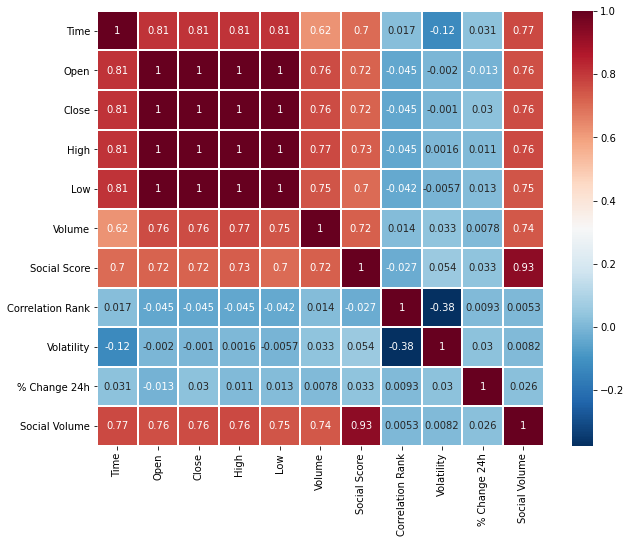

In [175]:
labels = ['Time', 'Open', 'Close', 'High', 'Low', 'Volume', 'Social Score', 'Correlation Rank', 'Volatility', '% Change 24h', 'Social Volume']

plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            cmap='RdBu_r',
            annot=True,
            linewidth=2, 
            xticklabels=labels, 
            yticklabels=labels)
plt.savefig('correlation_heatmap.png')
plt.show()
#Diverging colour palette to highlight both
#the highest value and lowest value.



In [40]:
df['time']

0      1567123200
1      1567209600
2      1567296000
3      1567382400
4      1567468800
          ...    
715    1628899200
716    1628985600
717    1629072000
718    1629158400
719    1629244800
Name: time, Length: 720, dtype: int64

In [41]:
datetime_df = pd.to_datetime(df['time'], unit='s', errors='raise')
pd.DataFrame(datetime_df)

time
0   2019-08-30
1   2019-08-31
2   2019-09-01
3   2019-09-02
4   2019-09-03
..         ...
715 2021-08-14
716 2021-08-15
717 2021-08-16
718 2021-08-17
719 2021-08-18

[720 rows x 1 columns]

In [42]:
df.drop(['time'], axis=1, inplace=True) #dropping time column to prepare for merge onto new time column

In [43]:
df.head() #chexking to see if time was successfully dropped

open         close          high           low        volume  \
0   9495.399060   9592.385842   9636.970473   9435.401440  1.039902e+10   
1   9667.671418   9612.302402   9667.671418   9612.302402  8.266929e+09   
2   9593.835884   9760.177254   9760.177254   9593.835884  8.184971e+09   
3   9862.492351  10374.426465  10380.344756   9862.492351  1.255304e+10   
4  10366.178781  10602.404439  10672.611272  10352.231916  1.337401e+10   

   social_score  correlation_rank  volatility  percent_change_24h  \
0     210852936               0.0    0.151796            0.893360   
1     198138317               0.0    0.090203            0.207629   
2     259500833               0.0    0.257690            1.538392   
3     321030863               0.0    0.740612            6.293423   
4     264399710               0.0    0.528566            2.197500   

   social_volume  
0          30007  
1          32715  
2          38628  
3          43166  
4          38263

In [44]:
df = pd.merge(left=df, right=datetime_df, left_index=True, right_index=True)
df #merging the time dataframe

open         close          high           low        volume  \
0     9495.399060   9592.385842   9636.970473   9435.401440  1.039902e+10   
1     9667.671418   9612.302402   9667.671418   9612.302402  8.266929e+09   
2     9593.835884   9760.177254   9760.177254   9593.835884  8.184971e+09   
3     9862.492351  10374.426465  10380.344756   9862.492351  1.255304e+10   
4    10366.178781  10602.404439  10672.611272  10352.231916  1.337401e+10   
..            ...           ...           ...           ...           ...   
715  47803.914436  47104.804361  48087.820230  46147.528118  4.136824e+10   
716  47106.487606  47018.900042  47371.004885  45769.721590  4.039261e+10   
717  47020.294197  45984.496357  47861.018974  45791.666944  4.407624e+10   
718  45980.403210  44799.054041  46992.328751  44525.655237  4.821344e+10   
719  44765.604024  45394.730992  45590.269049  44422.455194  2.897791e+10   

     social_score  correlation_rank  volatility  percent_change_24h  \
0       210852936               0.0    0.151796            0.893360   
1       198138317               0.0    0.090203            0.207629   
2       259500833               0.0    0.257690            1.538392   
3       321030863               0.0    0.740612            6.293423   
4       264399710               0.0    0.528566            2.197500   
..            ...               ...         ...                 ...   
715     995108664               4.0    0.021280           -1.365705   
716     899833321               2.5    0.010992           -0.182368   
717    1205480122               3.4    0.012564           -2.199974   
718    1164213025               2.5    0.012999           -2.577917   
719    1222601993               3.5    0.013381           -2.490000   

     social_volume       time  
0            30007 2019-08-30  
1            32715 2019-08-31  
2            38628 2019-09-01  
3            43166 2019-09-02  
4            38263 2019-09-03  
..             ...        ...  
715         281972 2021-08-14  
716         259767 2021-08-15  
717         292122 2021-08-16  
718         289323 2021-08-17  
719         319493 2021-08-18  

[720 rows x 11 columns]

In [45]:
df = df.rename({'time': 'date'}, axis=1, inplace=False) # returns a copy
df.head() #renaming the time 

open         close          high           low        volume  \
0   9495.399060   9592.385842   9636.970473   9435.401440  1.039902e+10   
1   9667.671418   9612.302402   9667.671418   9612.302402  8.266929e+09   
2   9593.835884   9760.177254   9760.177254   9593.835884  8.184971e+09   
3   9862.492351  10374.426465  10380.344756   9862.492351  1.255304e+10   
4  10366.178781  10602.404439  10672.611272  10352.231916  1.337401e+10   

   social_score  correlation_rank  volatility  percent_change_24h  \
0     210852936               0.0    0.151796            0.893360   
1     198138317               0.0    0.090203            0.207629   
2     259500833               0.0    0.257690            1.538392   
3     321030863               0.0    0.740612            6.293423   
4     264399710               0.0    0.528566            2.197500   

   social_volume       date  
0          30007 2019-08-30  
1          32715 2019-08-31  
2          38628 2019-09-01  
3          43166 2019-09-02  
4          38263 2019-09-03

In [46]:
df = df.set_index('date') #setting the date as the index in the DataFrame
df

open         close          high           low  \
date                                                                 
2019-08-30   9495.399060   9592.385842   9636.970473   9435.401440   
2019-08-31   9667.671418   9612.302402   9667.671418   9612.302402   
2019-09-01   9593.835884   9760.177254   9760.177254   9593.835884   
2019-09-02   9862.492351  10374.426465  10380.344756   9862.492351   
2019-09-03  10366.178781  10602.404439  10672.611272  10352.231916   
...                  ...           ...           ...           ...   
2021-08-14  47803.914436  47104.804361  48087.820230  46147.528118   
2021-08-15  47106.487606  47018.900042  47371.004885  45769.721590   
2021-08-16  47020.294197  45984.496357  47861.018974  45791.666944   
2021-08-17  45980.403210  44799.054041  46992.328751  44525.655237   
2021-08-18  44765.604024  45394.730992  45590.269049  44422.455194   

                  volume  social_score  correlation_rank  volatility  \
date                                                                   
2019-08-30  1.039902e+10     210852936               0.0    0.151796   
2019-08-31  8.266929e+09     198138317               0.0    0.090203   
2019-09-01  8.184971e+09     259500833               0.0    0.257690   
2019-09-02  1.255304e+10     321030863               0.0    0.740612   
2019-09-03  1.337401e+10     264399710               0.0    0.528566   
...                  ...           ...               ...         ...   
2021-08-14  4.136824e+10     995108664               4.0    0.021280   
2021-08-15  4.039261e+10     899833321               2.5    0.010992   
2021-08-16  4.407624e+10    1205480122               3.4    0.012564   
2021-08-17  4.821344e+10    1164213025               2.5    0.012999   
2021-08-18  2.897791e+10    1222601993               3.5    0.013381   

            percent_change_24h  social_volume  
date                                           
2019-08-30            0.893360          30007  
2019-08-31            0.207629          32715  
2019-09-01            1.538392          38628  
2019-09-02            6.293423          43166  
2019-09-03            2.197500          38263  
...                        ...            ...  
2021-08-14           -1.365705         281972  
2021-08-15           -0.182368         259767  
2021-08-16           -2.199974         292122  
2021-08-17           -2.577917         289323  
2021-08-18           -2.490000         319493  

[720 rows x 10 columns]

In [47]:
df['year'] = df.index.year
df['month'] = df.index.month_name()
df['weekday_name'] = df.index.day_name()
df

open         close          high           low  \
date                                                                 
2019-08-30   9495.399060   9592.385842   9636.970473   9435.401440   
2019-08-31   9667.671418   9612.302402   9667.671418   9612.302402   
2019-09-01   9593.835884   9760.177254   9760.177254   9593.835884   
2019-09-02   9862.492351  10374.426465  10380.344756   9862.492351   
2019-09-03  10366.178781  10602.404439  10672.611272  10352.231916   
...                  ...           ...           ...           ...   
2021-08-14  47803.914436  47104.804361  48087.820230  46147.528118   
2021-08-15  47106.487606  47018.900042  47371.004885  45769.721590   
2021-08-16  47020.294197  45984.496357  47861.018974  45791.666944   
2021-08-17  45980.403210  44799.054041  46992.328751  44525.655237   
2021-08-18  44765.604024  45394.730992  45590.269049  44422.455194   

                  volume  social_score  correlation_rank  volatility  \
date                                                                   
2019-08-30  1.039902e+10     210852936               0.0    0.151796   
2019-08-31  8.266929e+09     198138317               0.0    0.090203   
2019-09-01  8.184971e+09     259500833               0.0    0.257690   
2019-09-02  1.255304e+10     321030863               0.0    0.740612   
2019-09-03  1.337401e+10     264399710               0.0    0.528566   
...                  ...           ...               ...         ...   
2021-08-14  4.136824e+10     995108664               4.0    0.021280   
2021-08-15  4.039261e+10     899833321               2.5    0.010992   
2021-08-16  4.407624e+10    1205480122               3.4    0.012564   
2021-08-17  4.821344e+10    1164213025               2.5    0.012999   
2021-08-18  2.897791e+10    1222601993               3.5    0.013381   

            percent_change_24h  social_volume  year      month weekday_name  
date                                                                         
2019-08-30            0.893360          30007  2019     August       Friday  
2019-08-31            0.207629          32715  2019     August     Saturday  
2019-09-01            1.538392          38628  2019  September       Sunday  
2019-09-02            6.293423          43166  2019  September       Monday  
2019-09-03            2.197500          38263  2019  September      Tuesday  
...                        ...            ...   ...        ...          ...  
2021-08-14           -1.365705         281972  2021     August     Saturday  
2021-08-15           -0.182368         259767  2021     August       Sunday  
2021-08-16           -2.199974         292122  2021     August       Monday  
2021-08-17           -2.577917         289323  2021     August      Tuesday  
2021-08-18           -2.490000         319493  2021     August    Wednesday  

[720 rows x 13 columns]

## Time base indexing

#### 8th March 2021 - Tesla buys $1.5billion worth of bitcoin (43,000 bitcoin)

In [48]:
df.loc['2021-02-08'] 
#Key Observations

#Bitcoin opens at $39329 and closes at $46095 with the percentage increase of 18% on this particluar day.

#Would likely be an outlier


open                   39329.695164
close                  46095.184032
high                   46095.184032
low                    39166.382209
volume                94719813864.0
social_score             4294967295
correlation_rank                2.7
volatility                 0.030254
percent_change_24h         18.06467
social_volume                603214
year                           2021
month                      February
weekday_name                 Monday
Name: 2021-02-08 00:00:00, dtype: object

#### 22nd April 2021 - Capital Gains Tax increase announcement by Joe Biden

In [49]:
df.loc['2021-04-22']

#https://www.forbes.com/sites/sarahhansen/2021/04/22/biden-will-seek-to-nearly-double-capital-gains-tax-for-wealthy-according-to-report/

open                   54189.923783
close                  52017.971784
high                   54445.624629
low                    51598.893921
volume                89938806324.0
social_score             1454145049
correlation_rank                2.3
volatility                 0.016244
percent_change_24h        -4.053475
social_volume                322625
year                           2021
month                         April
weekday_name               Thursday
Name: 2021-04-22 00:00:00, dtype: object

#### 12 May 2021 -  Elon Musk tweeted that bitcoin would no longer be accepted by Tesla.

In [50]:
df.loc['2021-05-12']

open                   55168.807222
close                  50088.735033
high                   55168.807222
low                    50088.735033
volume                90101826244.0
social_score             1817508863
correlation_rank                3.6
volatility                 0.015014
percent_change_24h        -11.72452
social_volume                375272
year                           2021
month                           May
weekday_name              Wednesday
Name: 2021-05-12 00:00:00, dtype: object

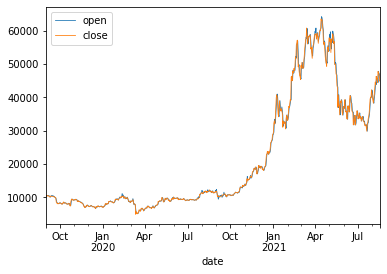

In [165]:
df[['open','close']].plot(linewidth=0.8); #Relationship of opening and closing price
plt.savefig('open_close_graph.png')
plt.show()

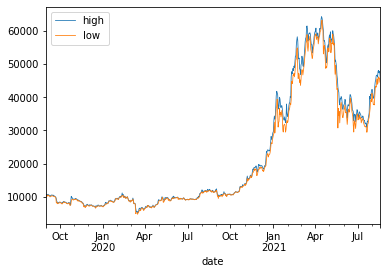

In [166]:
df[['high','low']].plot(linewidth=0.8); #relationship of high and low
plt.savefig('high_low_graph.png')
plt.show()

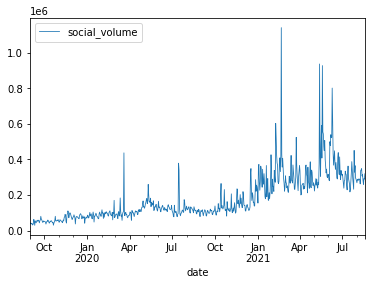

In [167]:
df['social_volume'].plot(linewidth=0.8).legend(loc = 'upper left')
plt.savefig('social_volume_graph.png')
plt.show()

#### Percentage change

This line graph represents the percentage change over time. In this observation we can see an outlier in March 2020 where the percentage decreased dramatically by 37%.

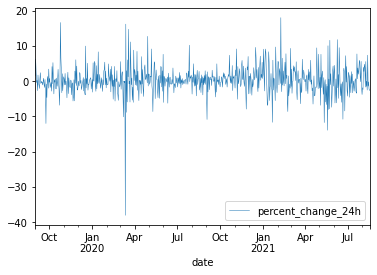

In [168]:
df[['percent_change_24h']].plot(linewidth=0.5).legend(loc = 'lower right')
plt.savefig('percentage_change_graph.png')
plt.show()

#### Looking into the specific month of March for a closer overview.

In [65]:
MarApr2020_pct_drop = df.loc['2020-03-01':'2020-04-01']

In [66]:
MarApr2020_pct_drop

open        close         high          low        volume  \
date                                                                           
2020-03-01  8471.677619  8495.216182  8495.216182  8471.677619  3.015095e+10   
2020-03-02  8989.020188  8970.267332  8989.020188  8970.267332  5.641627e+10   
2020-03-03  8707.250184  8767.081185  8767.081185  8707.250184  6.517201e+10   
2020-03-04  8826.032723  8836.091699  8836.091699  8826.032723  3.677595e+10   
2020-03-05  8922.482272  9052.157869  9052.157869  8922.482272  3.467217e+10   
2020-03-06  9634.270660  9298.589049  9634.270660  9298.589049  3.819632e+10   
2020-03-07  9050.584718  8885.568611  9050.584718  8885.568611  2.999479e+10   
2020-03-08  7918.966192  7987.440543  7987.440543  7918.966192  3.341157e+10   
2020-03-09  8096.345408  7992.625231  8096.345408  7992.625231  4.254181e+10   
2020-03-10  7936.053839  7956.397591  7987.823838  7936.053839  3.521043e+10   
2020-03-11  7775.866565  7958.423323  7958.423323  7775.866565  3.280578e+10   
2020-03-12  6541.191784  4929.866642  6548.284113  4929.866642  4.586799e+10   
2020-03-13  5497.300054  5729.924412  5774.586789  5131.663466  7.508243e+10   
2020-03-14  5433.577151  5224.898127  5433.577151  5199.067042  3.812454e+10   
2020-03-15  5231.620161  5381.503199  5623.939773  5231.620161  3.461477e+10   
2020-03-16  5191.877344  5065.053886  5191.877344  4733.390734  4.413477e+10   
2020-03-17  5154.841723  5372.941379  5449.711178  5129.082560  3.778667e+10   
2020-03-18  5395.727651  5441.544975  5442.606725  5242.943745  3.930895e+10   
2020-03-19  5736.246870  6245.090089  6364.738051  5678.902048  5.040644e+10   
2020-03-20  6142.796814  6204.579878  6589.168663  5929.035813  5.109724e+10   
2020-03-21  6205.865576  6208.407017  6346.547182  6068.885255  4.177492e+10   
2020-03-22  6013.358335  5841.491277  6126.942191  5819.363646  3.704341e+10   
2020-03-23  6038.426149  6494.109143  6549.541024  5998.073561  4.621757e+10   
2020-03-24  6524.232444  6753.213530  6753.213530  6503.860524  4.683950e+10   
2020-03-25  6719.143801  6686.817713  6802.784489  6558.572195  4.281130e+10   
2020-03-26  6751.401611  6748.222060  6773.161034  6674.744518  3.560937e+10   
2020-03-27  6615.590272  6386.524282  6637.495629  6376.026672  3.411859e+10   
2020-03-28  6388.981217  6279.957738  6388.981217  6213.436768  3.437536e+10   
2020-03-29  6132.941387  5903.990000  6132.941387  5903.990000  2.752815e+10   
2020-03-30  6059.747891  6426.471081  6473.971360  6059.747891  3.797909e+10   
2020-03-31  6432.743237  6439.621773  6481.269953  6432.743237  3.360063e+10   
2020-04-01  6511.398195  6656.749012  6656.749012  6411.754917  4.071922e+10   

            social_score  correlation_rank  volatility  percent_change_24h  \
date                                                                         
2020-03-01     247980000               4.1    0.009087           -0.757173   
2020-03-02     381719055               3.5    0.015641            5.591984   
2020-03-03     375194455               3.1    0.009270           -2.265107   
2020-03-04     329252298               2.0    0.006534            0.787155   
2020-03-05     316607400               3.4    0.013706            2.445269   
2020-03-06     242921889               3.3    0.006956            2.722347   
2020-03-07     204434722               3.0    0.010123           -4.441754   
2020-03-08     332825955               3.5    0.033167          -10.107716   
2020-03-09     372378184               2.9    0.037008            0.064911   
2020-03-10     311906980               3.2    0.013831           -0.453263   
2020-03-11     328528563               3.1    0.016798            0.025460   
2020-03-12     795340038               3.1    0.126220          -38.054732   
2020-03-13     472988117               3.1    0.108157           16.228791   
2020-03-14     322979447               3.3    0.036065           -8.813839   
2020-03-15     327828845               4.1    0.02

Here we can see the percentage decrease, between the 8th March 2020 and 12th March 2020 there was over a 30% decrease in the value of bitcoin, specifically on the 12th March 2020 the percentage drop was the lowest at 37%. Comparing this graph and the one below for social score you can see on the hightened social media activity with the highest social score reaching just under 800000000 on the 12th March, indicating the relationship exists between the social score and the fluaction in the value of BTC.
* Note that other traditional markets also plummeted during this time because of the pandemic which is another contributing factor to the percentage decrease.

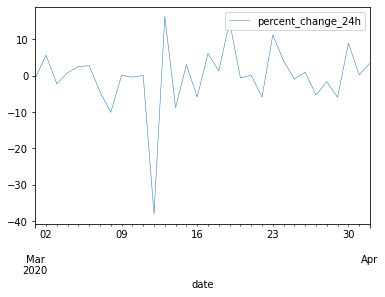

In [169]:
MarApr2020_pct_drop['percent_change_24h'].plot(linewidth=0.5).legend(loc='upper right')
plt.savefig('MarApri_pct_drop_graph.png')
plt.show()

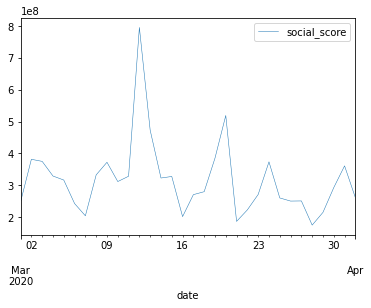

In [170]:
MarApr2020_pct_drop['social_score'].plot(linewidth=0.5).legend(loc='upper right')
plt.savefig('MarApri_pct_drop_graph_social_score.png')
plt.show()

## Correlation Scatterplot

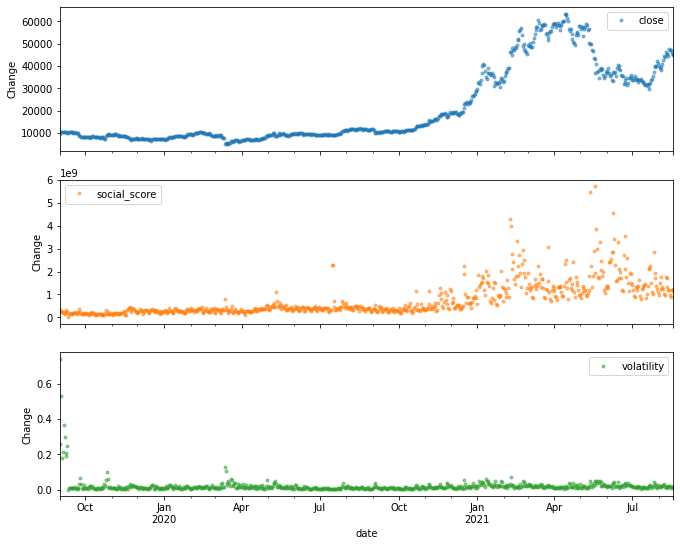

In [173]:
cols_plot = ['close', 'social_score','volatility']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Change')
plt.savefig('cor_plts_close_SocialScore_Volatility_graph.png')
plt.show()

## Predicting Volatility
#### This is what we should study and work on if we were to take our project futher.
#### Resource: https://python.plainenglish.io/how-to-predict-stock-volatility-with-python-46ae341ce804

#### Calculating the daily returns by calculating the close figure and using the percentage change function.

In [116]:
df['return'] = 100 * (df['close'].pct_change()) #adding a return column to the DataFrame

In [117]:
df

open         close          high           low  \
date                                                                 
2019-08-31   9667.671418   9612.302402   9667.671418   9612.302402   
2019-09-01   9593.835884   9760.177254   9760.177254   9593.835884   
2019-09-02   9862.492351  10374.426465  10380.344756   9862.492351   
2019-09-03  10366.178781  10602.404439  10672.611272  10352.231916   
2019-09-04  10558.217239  10567.312687  10707.844819  10178.037594   
...                  ...           ...           ...           ...   
2021-08-14  47803.914436  47104.804361  48087.820230  46147.528118   
2021-08-15  47106.487606  47018.900042  47371.004885  45769.721590   
2021-08-16  47020.294197  45984.496357  47861.018974  45791.666944   
2021-08-17  45980.403210  44799.054041  46992.328751  44525.655237   
2021-08-18  44765.604024  45394.730992  45590.269049  44422.455194   

                  volume  social_score  correlation_rank  volatility  \
date                                                                   
2019-08-31  8.266929e+09     198138317               0.0    0.090203   
2019-09-01  8.184971e+09     259500833               0.0    0.257690   
2019-09-02  1.255304e+10     321030863               0.0    0.740612   
2019-09-03  1.337401e+10     264399710               0.0    0.528566   
2019-09-04  1.147405e+10     237067039               0.0    0.178502   
...                  ...           ...               ...         ...   
2021-08-14  4.136824e+10     995108664               4.0    0.021280   
2021-08-15  4.039261e+10     899833321               2.5    0.010992   
2021-08-16  4.407624e+10    1205480122               3.4    0.012564   
2021-08-17  4.821344e+10    1164213025               2.5    0.012999   
2021-08-18  2.897791e+10    1222601993               3.5    0.013381   

            percent_change_24h  social_volume  year      month weekday_name  \
date                                                                          
2019-08-31            0.207629          32715  2019     August     Saturday   
2019-09-01            1.538392          38628  2019  September       Sunday   
2019-09-02            6.293423          43166  2019  September       Monday   
2019-09-03            2.197500          38263  2019  September      Tuesday   
2019-09-04           -0.330979          38027  2019  September    Wednesday   
...                        ...            ...   ...        ...          ...   
2021-08-14           -1.365705         281972  2021     August     Saturday   
2021-08-15           -0.182368         259767  2021     August       Sunday   
2021-08-16           -2.199974         292122  2021     August       Monday   
2021-08-17           -2.577917         289323  2021     August      Tuesday   
2021-08-18           -2.490000         319493  2021     August    Wednesday   

              return  
date                  
2019-08-31       NaN  
2019-09-01  1.538392  
2019-09-02  6.293423  
2019-09-03  2.197500  
2019-09-04 -0.330979  
...              ...  
2021-08-14 -1.365705  
2021-08-15 -0.182368  
2021-08-16 -2.199974  
2021-08-17 -2.577917  
2021-08-18  1.329664  

[719 rows x 14 columns]

In [109]:
df.isnull().sum() #Unsure why there is a null value in the return column for the 30th August 2019, in this instance dropping it would be ideal so not to mess up the prediction.

open                  0
close                 0
high                  0
low                   0
volume                0
social_score          0
correlation_rank      0
volatility            0
percent_change_24h    0
social_volume         0
year                  0
month                 0
weekday_name          0
return                1
dtype: int64

In [126]:
df.dropna(inplace=True)

In [127]:
df

open         close          high           low  \
date                                                                 
2019-09-01   9593.835884   9760.177254   9760.177254   9593.835884   
2019-09-02   9862.492351  10374.426465  10380.344756   9862.492351   
2019-09-03  10366.178781  10602.404439  10672.611272  10352.231916   
2019-09-04  10558.217239  10567.312687  10707.844819  10178.037594   
2019-09-05  10548.763294  10593.704916  10593.930427  10548.763294   
...                  ...           ...           ...           ...   
2021-08-14  47803.914436  47104.804361  48087.820230  46147.528118   
2021-08-15  47106.487606  47018.900042  47371.004885  45769.721590   
2021-08-16  47020.294197  45984.496357  47861.018974  45791.666944   
2021-08-17  45980.403210  44799.054041  46992.328751  44525.655237   
2021-08-18  44765.604024  45394.730992  45590.269049  44422.455194   

                  volume  social_score  correlation_rank  volatility  \
date                                                                   
2019-09-01  8.184971e+09     259500833               0.0    0.257690   
2019-09-02  1.255304e+10     321030863               0.0    0.740612   
2019-09-03  1.337401e+10     264399710               0.0    0.528566   
2019-09-04  1.147405e+10     237067039               0.0    0.178502   
2019-09-05  9.848187e+09     248382031               0.0    0.212571   
...                  ...           ...               ...         ...   
2021-08-14  4.136824e+10     995108664               4.0    0.021280   
2021-08-15  4.039261e+10     899833321               2.5    0.010992   
2021-08-16  4.407624e+10    1205480122               3.4    0.012564   
2021-08-17  4.821344e+10    1164213025               2.5    0.012999   
2021-08-18  2.897791e+10    1222601993               3.5    0.013381   

            percent_change_24h  social_volume  year      month weekday_name  \
date                                                                          
2019-09-01            1.538392          38628  2019  September       Sunday   
2019-09-02            6.293423          43166  2019  September       Monday   
2019-09-03            2.197500          38263  2019  September      Tuesday   
2019-09-04           -0.330979          38027  2019  September    Wednesday   
2019-09-05            0.249753          41008  2019  September     Thursday   
...                        ...            ...   ...        ...          ...   
2021-08-14           -1.365705         281972  2021     August     Saturday   
2021-08-15           -0.182368         259767  2021     August       Sunday   
2021-08-16           -2.199974         292122  2021     August       Monday   
2021-08-17           -2.577917         289323  2021     August      Tuesday   
2021-08-18           -2.490000         319493  2021     August    Wednesday   

              return  
date                  
2019-09-01  1.538392  
2019-09-02  6.293423  
2019-09-03  2.197500  
2019-09-04 -0.330979  
2019-09-05  0.249753  
...              ...  
2021-08-14 -1.365705  
2021-08-15 -0.182368  
2021-08-16 -2.199974  
2021-08-17 -2.577917  
2021-08-18  1.329664  

[718 rows x 14 columns]

#### Plot Daily Returns

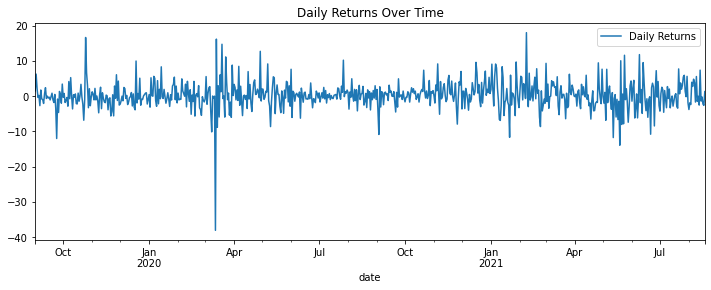

In [174]:
fig = plt.figure()
fig.set_figwidth(12)
df['return'].plot(label = 'Daily Returns', title = 'Daily Returns Over Time').legend(loc='upper right')
plt.savefig('Daily_Returns_graph.png')
plt.show()

In [163]:
daily_volatility = df['return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

Daily volatility:  3.96%
Monthly volatility:  18.15%
Annual volatility:  62.88%
